## **<u>Data Analysis of Crop Production :**

**Project Statement:**

The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet.This dataset provides a huge amount of information on crop production in India
ranging from several years. Based on the Information the ultimate goal would be to
predict crop production and find important insights highlighting key indicators and
metrics that influence crop production.

**Technologies Used:**

- **Python**: Utilized for initial data cleaning, Exploratory Data Analysis (EDA), and generating insights through statistical analysis and visualization
    1. Pandas: For data manipulation and analysis, including handling missing values, filtering, and creating new columns.
    2. Matplotlib and Seaborn: For creating various plots and visualizations to explore and understand data distributions and relationships.
- **Jupyter Notebook**: As an interactive environment for coding and documenting the analysis process.
- **Excel**: For initial data understanding and basic data cleaning (although the large dataset required transitioning to Python for efficiency).
- **PowerBI**: Planned for creating interactive and easy-to-understand dashboards to visualize the key insights and findings from the EDA.

<font size="4"><b> Importing essential Libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization data
%matplotlib inline
import seaborn as sns

In [2]:
# creating a Dataframe using Pandas to read the raw data files
data = pd.read_csv('Crop Production data.csv')

In [3]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
# Displaying the shape of the raw DataFrame
data.shape

(246091, 7)

In [5]:
#checking the datatypes of all the columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
#Names of all columns in the Dataframe
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [7]:
#Creating a new column named "Date" having the datatype of date
data["Date"] = pd.to_datetime(data["Crop_Year"] , format = '%Y')

In [8]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Date
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2000-01-01
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01


In [9]:
#All unique state names
data["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [10]:
#ALl uniques date
data["Date"].unique()

<DatetimeArray>
['2000-01-01 00:00:00', '2001-01-01 00:00:00', '2002-01-01 00:00:00',
 '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2005-01-01 00:00:00',
 '2006-01-01 00:00:00', '2010-01-01 00:00:00', '1997-01-01 00:00:00',
 '1998-01-01 00:00:00', '1999-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2011-01-01 00:00:00',
 '2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00',
 '2015-01-01 00:00:00']
Length: 19, dtype: datetime64[ns]

In [11]:
#All unique Season
data["Season"].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

<b>Categorizing the 6 Season into 4 major Indian Cropping Seasons

In [12]:
data["Season"] = data["Season"].apply( lambda x : "Rabi" if x == "Winter" else  x )
data["Season"] = data["Season"].apply( lambda x : "Rabi" if x == "Autumn" else  x )
data["Season"] = data["Season"].apply( lambda x : "Zaid" if x == "Summer" else  x )
print(data["Season"].unique())

['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']


In [13]:
data["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [14]:
data["Crop"].nunique()

124

<font size = 4> <b>Since many of the crop names were repeated,duplicated, or having wrong spelling. Combining all the duplicated or duplicated into one crop and correcting the spelling of all the incorrect ones.</font>

In [15]:
data["Crop"] = data["Crop"].apply( lambda x : "Seasum" if x == "Sesamum" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Pomegranate" if x == "Pome Granet" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Sunhemp" if x == "Sannhamp" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Raddish" if x == "Redish" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Soybean" if x == "Soyabean" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Snake Gourd" if x == "Snak Guard" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Pumpkin" if x == "Pump Kin" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Paddy" if x == "Rice" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Blackgram" if x == "Urad" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Lentil" if x == "Masoor" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Jute & mesta" if x == "Jute" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Jute & mesta" if x == "Mesta" else  x )
data["Crop"] = data["Crop"].apply( lambda x : "Cotton(lint)" if x == "Kapas" else  x )

Unique_Crop = data["Crop"].unique()
print(Unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Paddy' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Blackgram' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Lentil' 'Seasum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soybean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Jute & mesta' 'Cowpea(Lobia)'
 'Lemon' 'Pomegranate' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sunhemp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Peas & beans (Pulses)' 'Pineapple' 'Barley' 'Khesari'
 'Guar seed' 'Moth' 'Other Cereals & 

In [16]:
#count the unique crops 
data["Crop"].nunique()

118

<font size="4"> <b>India has a huge variety of crops grown. It would be easier to analyze if all the crops are further categorized into crop categories. </font>

In [17]:
def category_name(name):
    Cereals = ['Wheat','Maize','Bajra','Paddy', 'Jowar', 'Korra','Ragi','Small millets','Samai', 'Varagu','Barley','Khesari','Other Cereals & Millets','Total foodgrain','Jobster']
    Pulses = ['Pulses total','Other  Rabi pulses','Other Kharif pulses','Moong(Green Gram)','Blackgram','Lentil','Arhar/Tur','Horse-gram','Gram','other misc. pulses','Other rabi pulses','Other fibres','Cowpea(Lobia)','Peas & beans (Pulses)','Moth','Bean','Rajmash Kholar','Ricebean (nagadal)']
    Vegetables = ['Beans & Mutter(Vegetable)','Lemon','Sweet potato','Tapioca','Onion','Potato','Bhindi','Brinjal','Cucumber','Other Vegetables','Tomato','Cabbage','Peas  (vegetable)','Bottle Gourd','Turnip','Carrot','Raddish','Bitter Gourd','Drum Stick','Jack Fruit','Snake Gourd','Pumpkin','Cauliflower','Colocosia','Ash Gourd','Beet Root','Lab-Lab','Ribed Guard','Yam','Perilla']
    Fruits = ['Sapota','Banana','Citrus Fruit','Grapes','Mango','Orange','Other Fresh Fruits','Papaya','Pome Fruit','Pomegranate','Pineapple','Other Citrus Fruit','Water Melon','Apple','Peach','Pear','Plums','Litchi','Ber']
    Oilseeds = ['other oilseeds','Groundnut','Sunflower','Castor seed','Safflower','Linseed','Seasum','Rapeseed &Mustard','Niger seed','Oilseeds total','Sunhemp','Soybean']
    Condiments = ['Dry ginger','Black pepper','Dry chillies','Turmeric','Coriander','Garlic','Ginger','Cond-spcs other','Cardamom','Arcanut (Processed)','Atcanut (Raw)','Arecanut']
    Dryfruits = ['Cashewnut','Cashewnut Processed','Cashewnut Raw','Other Dry Fruit']
    Plantation = ['Coconut','Sugarcane','Cotton(lint)','Tobacco','Jute & mesta','Guar seed','Rubber','Tea','Coffee','other fibres']
    if name in Cereals:
        return 'Cereal'
    elif name in Pulses:
        return 'Pulses'
    elif name in Vegetables:
        return 'Vegetable'
    elif name in Fruits:
        return 'Fruit'
    elif name in Oilseeds:
        return 'Oilseed'
    elif name in Condiments:
        return 'Condiment'
    elif name in Dryfruits:
        return 'Dryfruit'
    elif name in Plantation:
        return 'Plantation'
    else:
        return 'None'
    
data["Category"] = data["Crop"].apply(category_name)
print(data["Category"].unique())

['Condiment' 'Pulses' 'Cereal' 'Fruit' 'Dryfruit' 'None' 'Plantation'
 'Vegetable' 'Oilseed']


<font size="4"> <b> Categorizing all the indian states into their respected regions. </font>

In [18]:
def category(name):
    east_india = ['West Bengal', 'Tripura', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim','Odisha']
    west_india = ['Maharashtra', 'Gujarat', 'Dadra and Nagar Haveli', 'Goa', 'Rajasthan']
    north_india = ['Bihar', 'Chandigarh', 'Chhattisgarh', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand', 'Madhya Pradesh', 'Punjab', 'Uttar Pradesh', 'Uttarakhand']
    south_india = ['Tamil Nadu', 'Telangana ', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry']
    
    if name in east_india:
        return 'East India'
    elif name in west_india:
        return 'West India'
    elif name in north_india:
        return 'North India'
    elif name in south_india:
        return 'South India'
    else:
        return 'None'
    
data["Region"] = data["State_Name"].apply(category)
print(data["Region"].unique())

['South India' 'East India' 'North India' 'West India']


In [19]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Date,Category,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01,Condiment,South India
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01,Pulses,South India
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Paddy,102.0,321.0,2000-01-01,Cereal,South India
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01,Fruit,South India
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Dryfruit,South India


In [20]:
ny_df = data.loc[data['Region'] == 'None']
ny_df["State_Name"].unique()

array([], dtype=object)

In [21]:
data.columns = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area(hectare)',
       'Production(tonnes)', 'Date', 'Category', 'Region']

In [22]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(hectare),Production(tonnes),Date,Category,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01,Condiment,South India
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01,Pulses,South India
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Paddy,102.0,321.0,2000-01-01,Cereal,South India
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01,Fruit,South India
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Dryfruit,South India


<font size = 4><b>Creating a new column named "roductivity" and "Total Production" </font>

In [23]:
data["Productivity"] = data["Production(tonnes)"] / data["Area(hectare)"]
data["Total Production"] = data["Production(tonnes)"] * data["Area(hectare)"]

In [24]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

In [25]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(hectare),Production(tonnes),Date,Category,Region,Productivity,Total Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01,Condiment,South India,1.594896,2508000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01,Pulses,South India,0.500000,2.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Paddy,102.0,321.0,2000-01-01,Cereal,South India,3.147059,32742.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01,Fruit,South India,3.642045,112816.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Dryfruit,South India,0.229167,118800.0


In [26]:
data["Area(hectare)"].unique()

array([1.25400e+03, 2.00000e+00, 1.02000e+02, ..., 3.02274e+05,
       1.14930e+04, 2.79151e+05])

In [27]:
data["Area(hectare)"].nunique()

38442

<b>Dropping all the null values

In [28]:
data = data.dropna(axis=0)


<font size = 4 ><b>Dropping all the rows in which Area is 1,2,3,4,5,6,7 and 10 </font>

In [29]:
data = data.drop(data[data['Area(hectare)'] == 1].index)
data = data.drop(data[data['Area(hectare)'] == 2].index)
data = data.drop(data[data['Area(hectare)'] == 3].index)
data = data.drop(data[data['Area(hectare)'] == 4].index)
data = data.drop(data[data['Area(hectare)'] == 5].index)
data = data.drop(data[data['Area(hectare)'] == 6].index)
data = data.drop(data[data['Area(hectare)'] == 7].index)
data = data.drop(data[data['Area(hectare)'] == 10].index)

In [30]:
data["Area(hectare)"].nunique()

38383

<font size=4> <b>Dropping all the rows in which Production is 0,1,2,3,4,5,6 and 10 </font>

In [31]:
data = data.drop(data[data['Production(tonnes)'] == 1].index)
data = data.drop(data[data['Production(tonnes)'] == 0].index)
data = data.drop(data[data['Production(tonnes)'] == 2].index)
data = data.drop(data[data['Production(tonnes)'] == 3].index)
data = data.drop(data[data['Production(tonnes)'] == 4].index)
data = data.drop(data[data['Production(tonnes)'] == 5].index)
data = data.drop(data[data['Production(tonnes)'] == 6].index)
data = data.drop(data[data['Production(tonnes)'] == 10].index)

In [32]:
data.to_csv("Cleaned.csv", index = False)

In [33]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

(array([2.16285e+05, 6.30000e+01, 3.60000e+01, 2.80000e+01, 1.70000e+01,
        1.00000e+00, 7.00000e+00, 1.40000e+01, 9.00000e+00, 2.00000e+00]),
 array([5.60000000e-03, 1.38793599e+13, 2.77587198e+13, 4.16380797e+13,
        5.55174396e+13, 6.93967995e+13, 8.32761594e+13, 9.71555193e+13,
        1.11034879e+14, 1.24914239e+14, 1.38793599e+14]),
 <BarContainer object of 10 artists>)

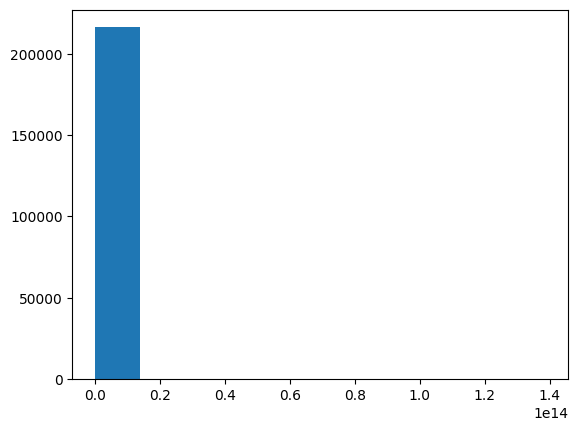

In [34]:
plt.hist(data["Total Production"])

<font size="4"> <b> Removing the outliers </font> 

In [35]:
Q1 = data["Total Production"].quantile(0.40)
Q3 = data["Total Production"].quantile(0.60)
IQR = Q3 - Q1

data = data[(data["Total Production"] >= Q1 - 1.5*IQR) & (data["Total Production"] <= Q3 + 1.5*IQR)]

In [36]:
Q1 = data["Area(hectare)"].quantile(0.40)
Q3 = data["Area(hectare)"].quantile(0.60)
IQR = Q3 - Q1

data = data[(data["Area(hectare)"] >= Q1 - 1.5*IQR) & (data["Area(hectare)"] <= Q3 + 1.5*IQR)]

In [37]:
Q1 = data["Productivity"].quantile(0.40)
Q3 = data["Productivity"].quantile(0.60)
IQR = Q3 - Q1

data = data[(data["Productivity"] >= Q1 - 1.5*IQR) & (data["Productivity"] <= Q3 + 1.5*IQR)]

(array([6.134e+04, 6.750e+03, 3.089e+03, 1.558e+03, 8.510e+02, 4.730e+02,
        2.280e+02, 1.370e+02, 8.400e+01, 3.200e+01]),
 array([5.60000000e-03, 1.42947605e+05, 2.85895204e+05, 4.28842804e+05,
        5.71790403e+05, 7.14738003e+05, 8.57685602e+05, 1.00063320e+06,
        1.14358080e+06, 1.28652840e+06, 1.42947600e+06]),
 <BarContainer object of 10 artists>)

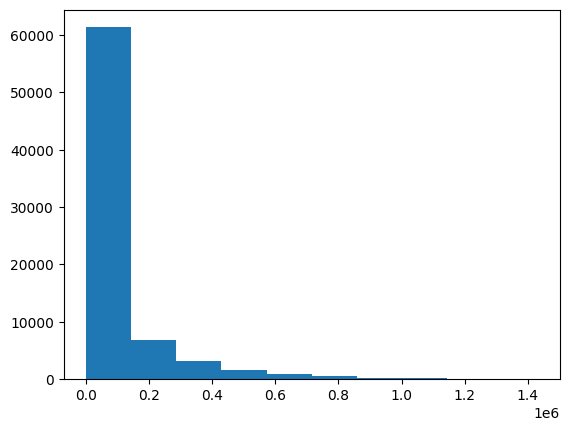

In [38]:
plt.hist(data["Total Production"])

(array([ 4673., 13143., 14839., 12618., 10897.,  5479.,  4207.,  3461.,
         2751.,  2474.]),
 array([0.02020202, 0.22818182, 0.43616162, 0.64414141, 0.85212121,
        1.06010101, 1.26808081, 1.47606061, 1.6840404 , 1.8920202 ,
        2.1       ]),
 <BarContainer object of 10 artists>)

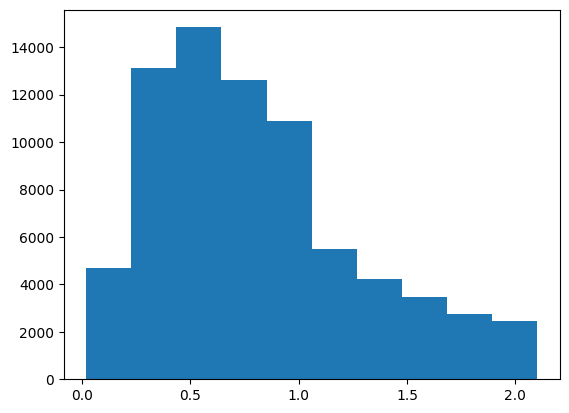

In [39]:
plt.hist(data["Productivity"])

(array([24109., 13792.,  8921.,  6728.,  5149.,  4113.,  3059.,  3299.,
         2769.,  2603.]),
 array([1.0000e-01, 8.3690e+01, 1.6728e+02, 2.5087e+02, 3.3446e+02,
        4.1805e+02, 5.0164e+02, 5.8523e+02, 6.6882e+02, 7.5241e+02,
        8.3600e+02]),
 <BarContainer object of 10 artists>)

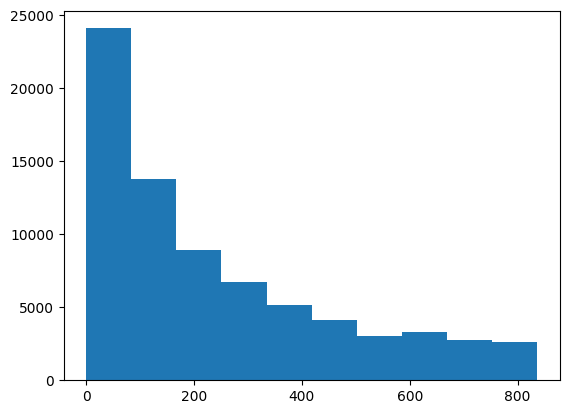

In [40]:
plt.hist(data["Area(hectare)"])

In [41]:
data.to_csv("CleanedIQR.csv", index = False)

## **<u>Data Analysis :-</u>**

In [42]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(hectare),Production(tonnes),Date,Category,Region,Productivity,Total Production
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Dryfruit,South India,0.229167,118800.0
13,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Cashewnut,719.0,192.0,2001-01-01,Dryfruit,South India,0.267038,138048.0
21,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Black pepper,63.0,13.5,2002-01-01,Condiment,South India,0.214286,850.5
22,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Cashewnut,719.0,208.0,2002-01-01,Dryfruit,South India,0.289291,149552.0
24,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Dry chillies,413.0,28.8,2002-01-01,Condiment,South India,0.069734,11894.4


C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\731465595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_by_entries.values, y=top_states_by_entries.index, palette='Blues_r')


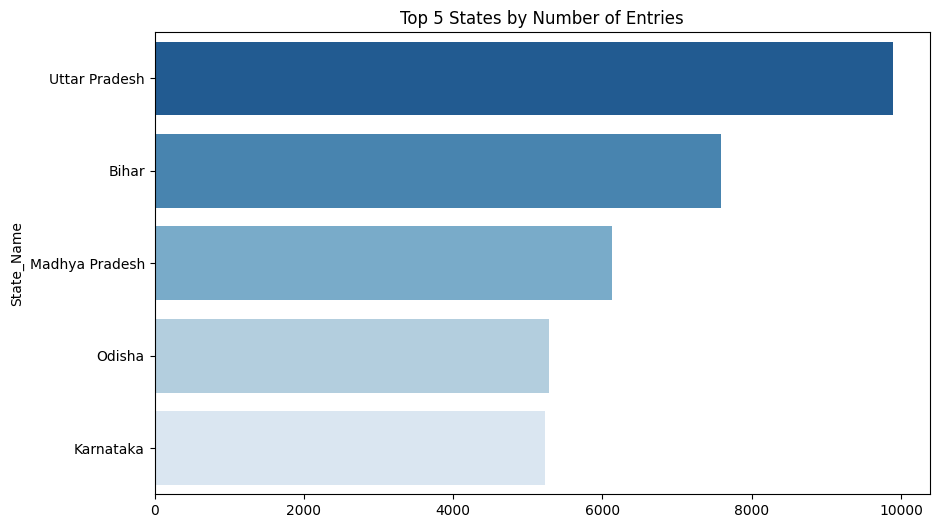

In [130]:
# 1. Top 5 States by Number of Entries
plt.figure(figsize=(10, 6))
top_states_by_entries = data['State_Name'].value_counts().nlargest(5)
sns.barplot(x=top_states_by_entries.values, y=top_states_by_entries.index, palette='Blues_r')
plt.title('Top 5 States by Number of Entries')
plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\2599737468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_productivity_by_crop.values, x=avg_productivity_by_crop.index, palette='coolwarm')


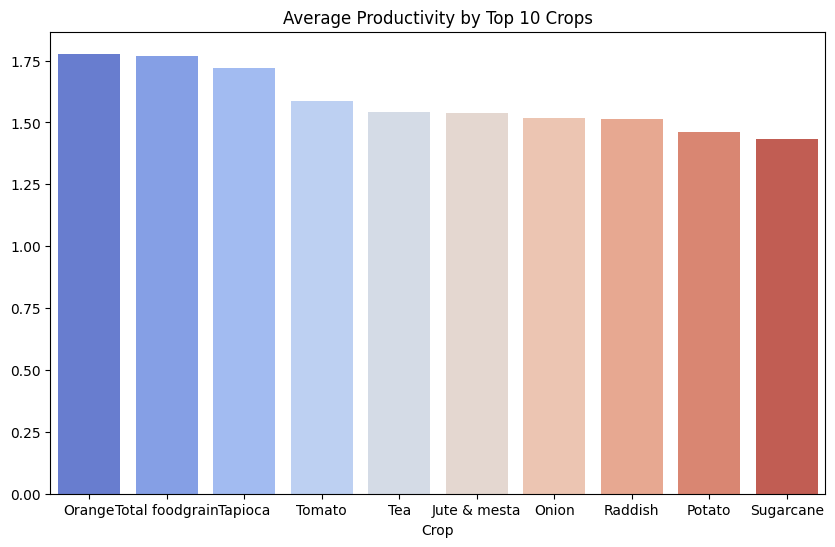

In [133]:
#2. Average Productivity by Crop (Top 10 Crops)
plt.figure(figsize=(10, 6))
avg_productivity_by_crop = data.groupby('Crop')['Productivity'].mean().nlargest(10)
sns.barplot(y=avg_productivity_by_crop.values, x=avg_productivity_by_crop.index, palette='coolwarm')
plt.title('Average Productivity by Top 10 Crops')
plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\1259614038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot (data = data , x = 'Crop_Year' , y= 'Production(tonnes)', ci=None)


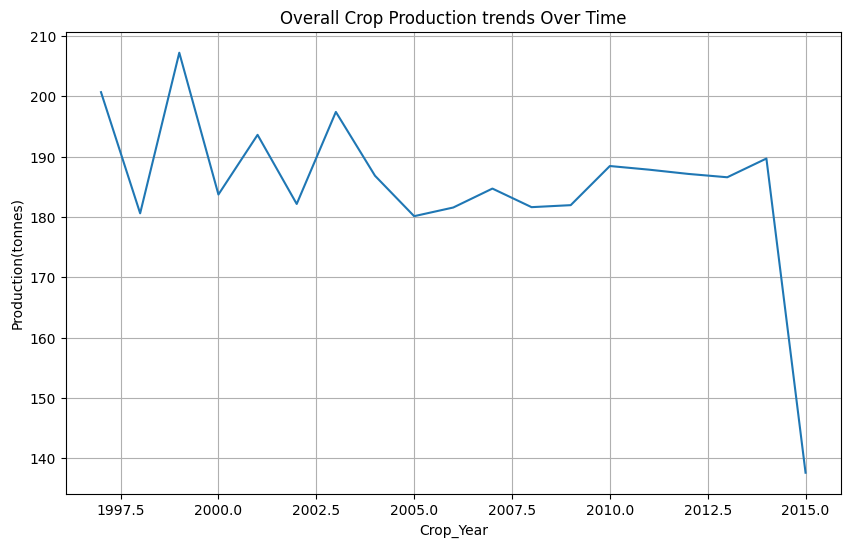

In [109]:
#3. Overall crop Production
plt.figure(figsize = (10,6))
sns.lineplot (data = data , x = 'Crop_Year' , y= 'Production(tonnes)', ci=None)
plt.title('Overall Crop Production trends Over Time')
plt.grid(True)
plt.show()

TypeError: 'str' object is not callable

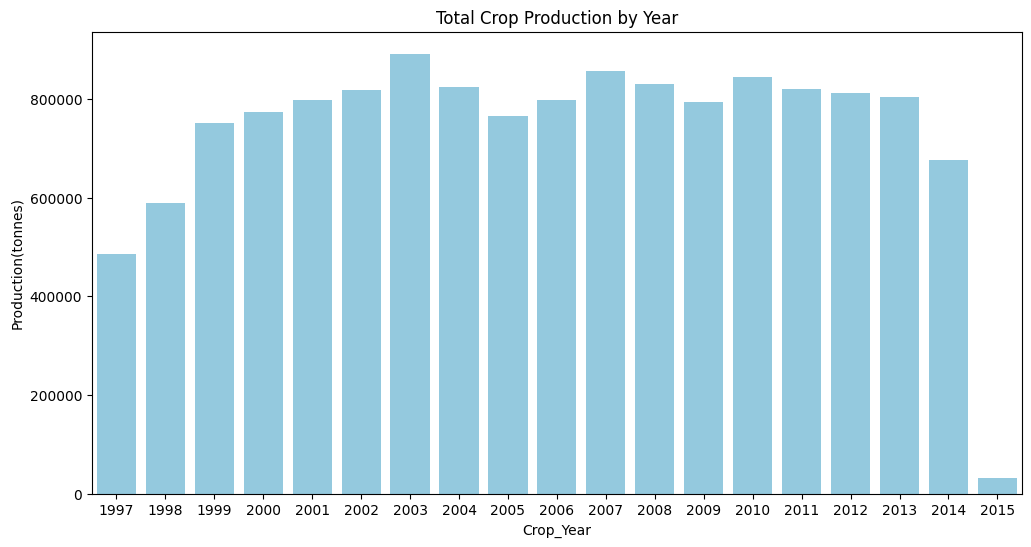

In [136]:
#4. Crop_production vs year

# Grouping the data by year and summing the production
yearly_production = data.groupby('Crop_Year')['Production(tonnes)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_production, x='Crop_Year', y='Production(tonnes)', color='skyblue')
plt.title('Total Crop Production by Year')
plt.xticks(rotation=45)
plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\218895666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=State_production.values , y=State_production.index, palette="coolwarm")


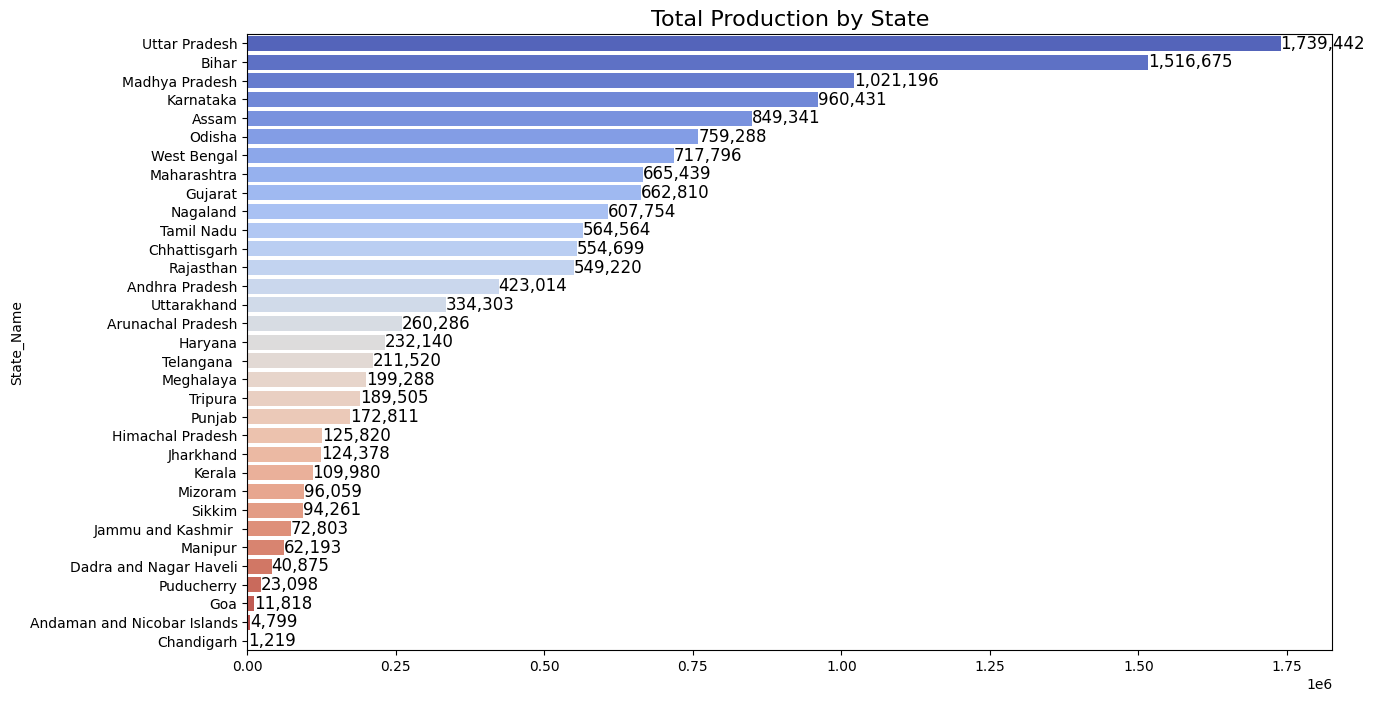

In [86]:
#5a. Total Production by State
State_production = data.groupby('State_Name')['Production(tonnes)'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
sns.barplot(x=State_production.values , y=State_production.index, palette="coolwarm")
plt.title('Total Production by State', fontsize=16)
#plt.xlabel('Production(tonnes)', fontsize=14)
#plt.ylabel('State', fontsize=14)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
# Adding data labels
for index, value in enumerate(State_production.values):
    plt.text(value, index, f'{value:,.0f}', color='black', va="center", fontsize=12)

plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\4028363154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=State_production.values, y=State_production.index, palette="coolwarm")


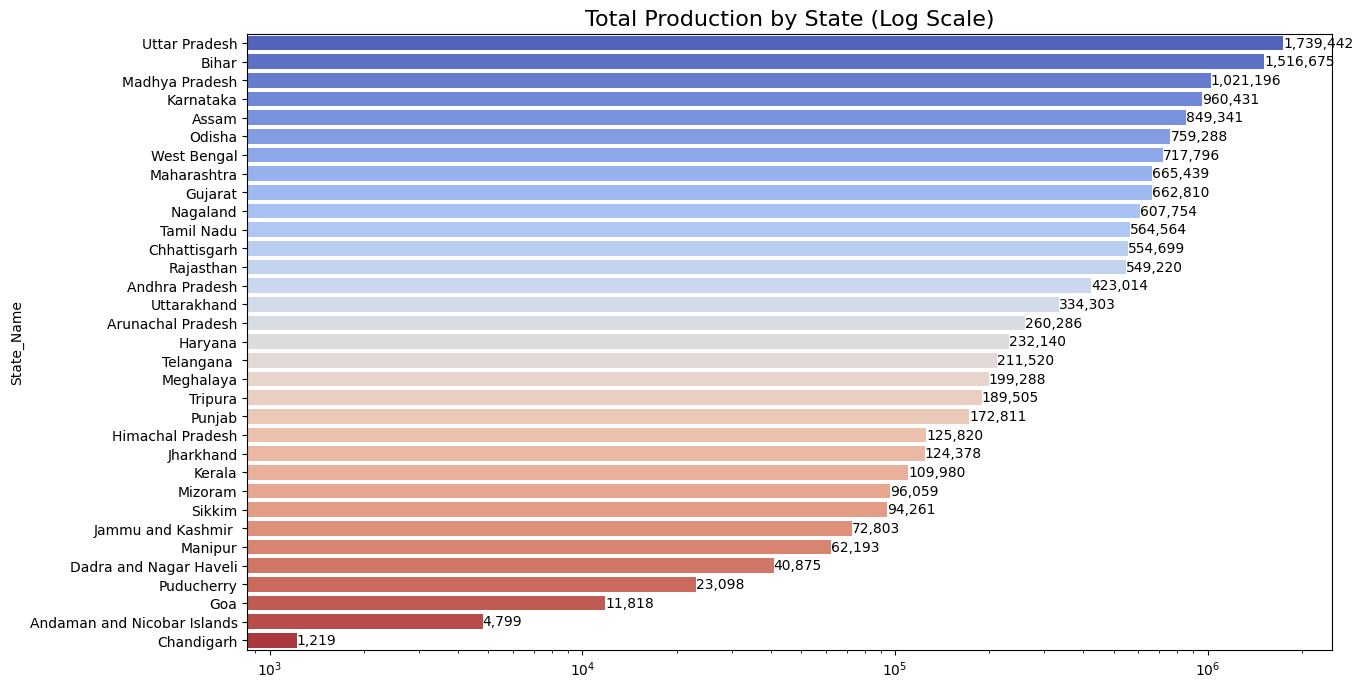

In [87]:
#5b. Total Production by State (Log Scale)
plt.figure(figsize=(14,8))
ax = sns.barplot(x=State_production.values, y=State_production.index, palette="coolwarm")
ax.set_xscale("log")
plt.title('Total Production by State (Log Scale)', fontsize=16)
# Adding data labels
for index, value in enumerate(State_production.values):
    plt.text(value, index, f'{value:,.0f}', color='black', va="center", fontsize=10)
plt.show()

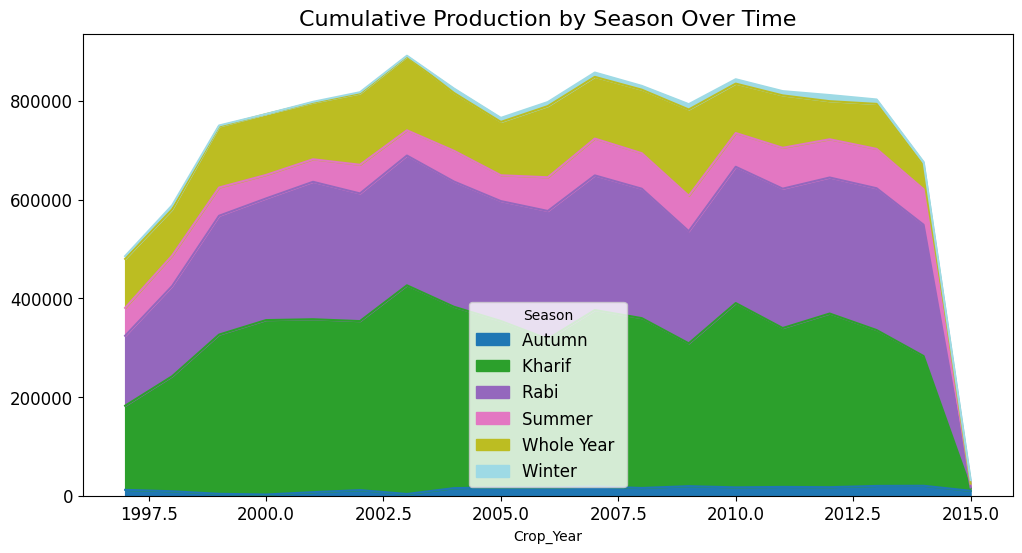

In [95]:
#6. Cumulative Production by Season Over time
data_area= data.groupby(['Crop_Year','Season'])['Production(tonnes)'].sum().unstack().fillna(0)
data_area.plot(kind='area' , stacked = True , figsize=(12,6) , colormap='tab20')
# Adding title and labels
plt.title('Cumulative Production by Season Over Time', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Season', fontsize=12)
plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\2510532402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Crop_Year', y='Production(tonnes)', hue='Region', estimator='sum', ci=None)


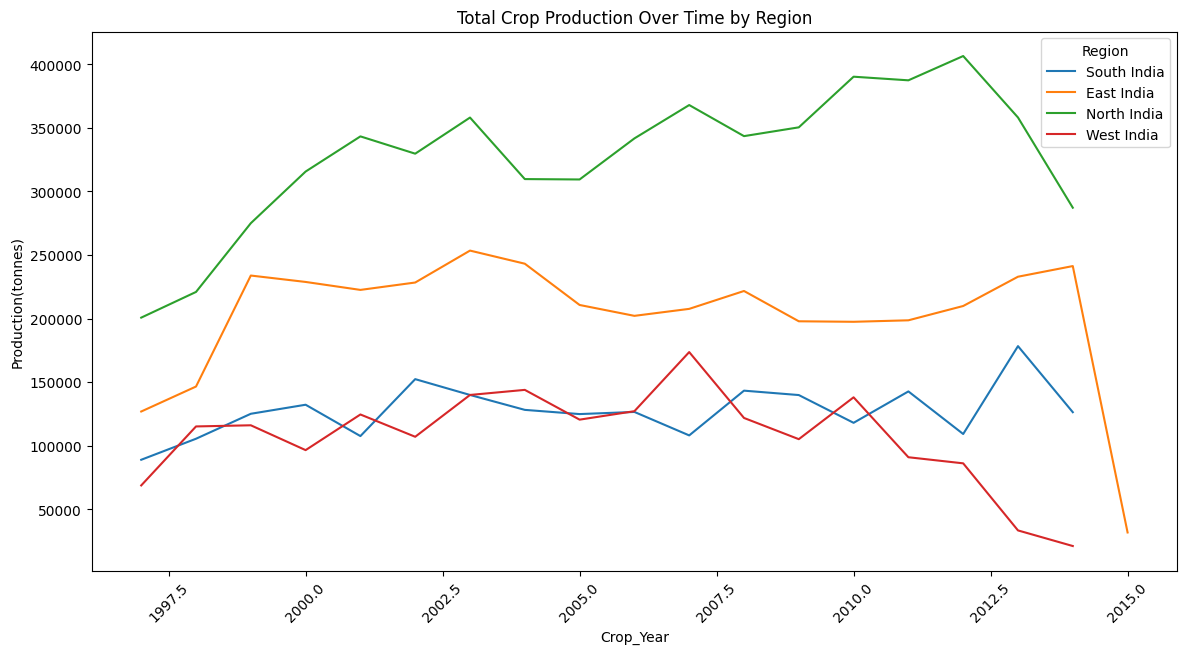

In [108]:
# 7. Production Trends Over Time by Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Crop_Year', y='Production(tonnes)', hue='Region', estimator='sum', ci=None)
plt.title('Total Crop Production Over Time by Region')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\1760866083.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Crop_Year', y='Production(tonnes)', hue='Season', estimator='sum', ci=None, marker="o", palette="tab10")


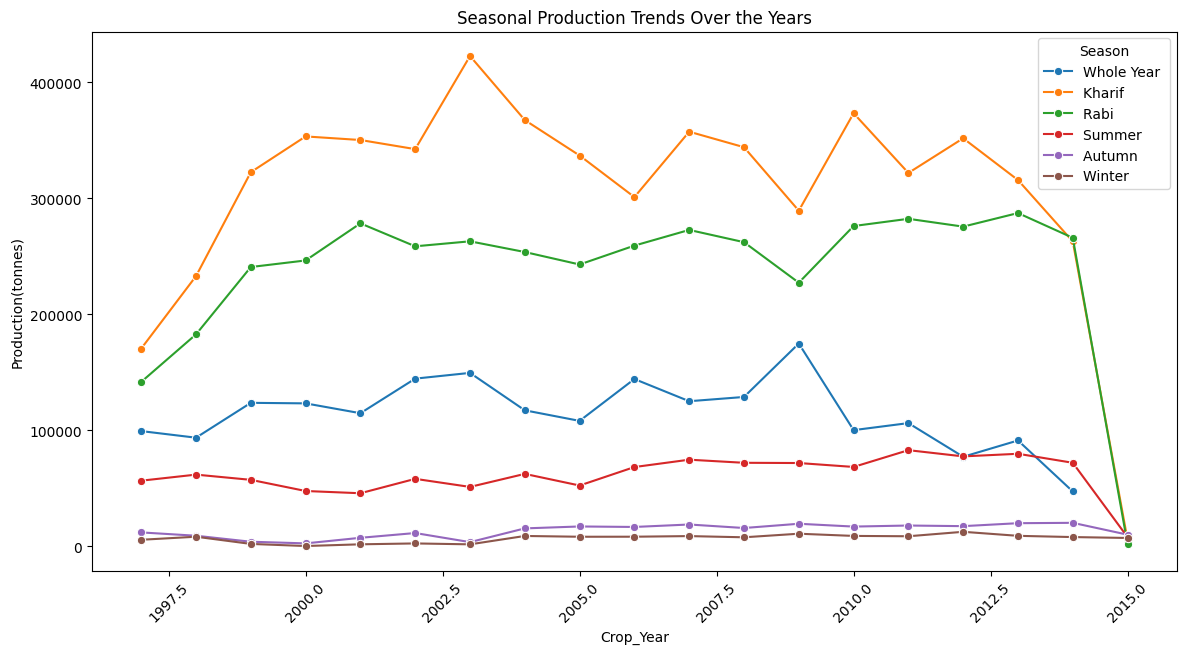

In [126]:
# 8. Seasonal Production Trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Crop_Year', y='Production(tonnes)', hue='Season', estimator='sum', ci=None, marker="o", palette="tab10")
plt.title('Seasonal Production Trends Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()

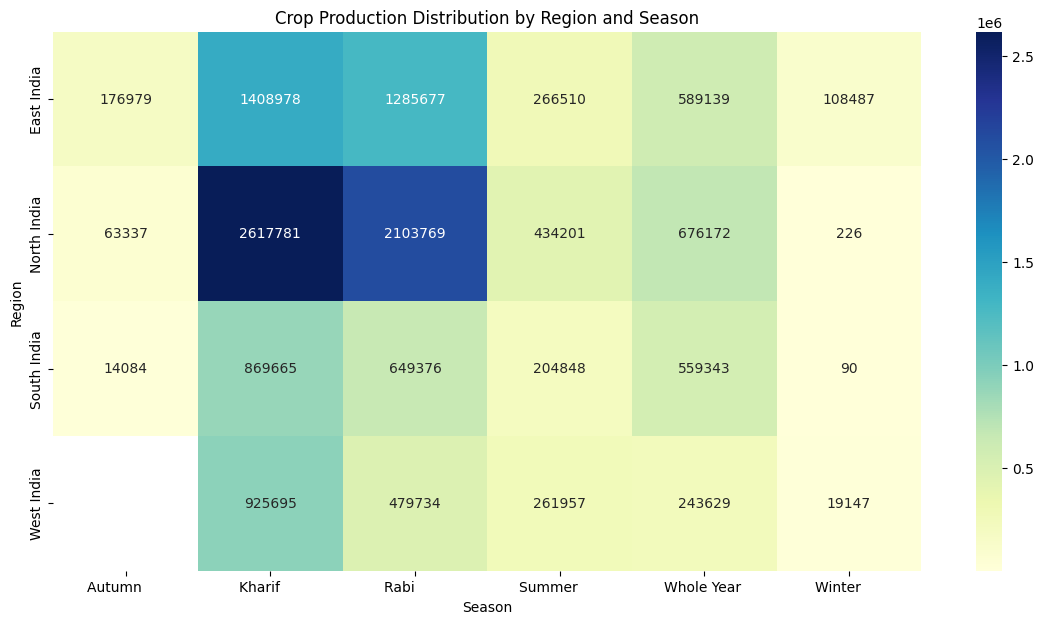

In [112]:
#9. Crop Production Distribution by Region and Season
plt.figure(figsize=(14, 7))
crop_season = pd.crosstab(index=data['Region'], columns=data['Season'], values=data['Production(tonnes)'], aggfunc='sum')
sns.heatmap(crop_season, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Crop Production Distribution by Region and Season')
plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\4051062450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_crops_by_production.values, x=top_crops_by_production.index, palette="viridis")


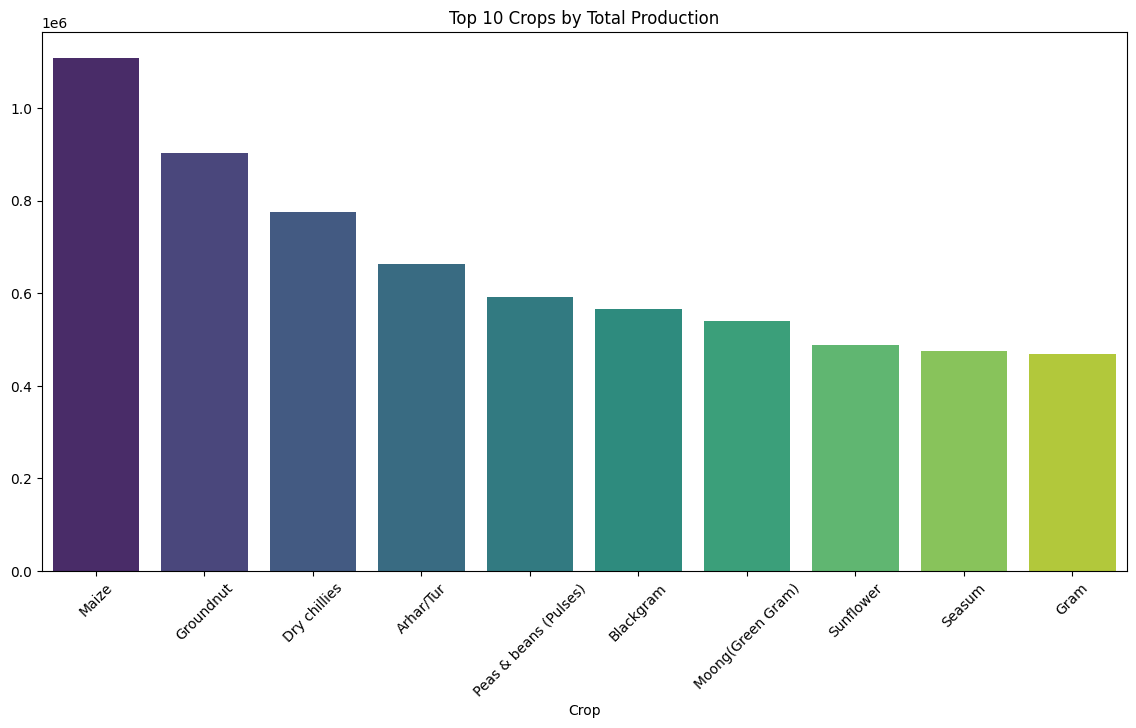

In [118]:
#10. Top 10 Crops by Total Production
plt.figure(figsize=(14, 7))
top_crops_by_production = data.groupby('Crop')['Production(tonnes)'].sum().nlargest(10)
sns.barplot(y=top_crops_by_production.values, x=top_crops_by_production.index, palette="viridis")
plt.title('Top 10 Crops by Total Production')
plt.xticks(rotation=45)
plt.show()

C:\Users\bibya\AppData\Local\Temp\ipykernel_8868\1337946214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_production.values, y=category_production.index, palette="magma")


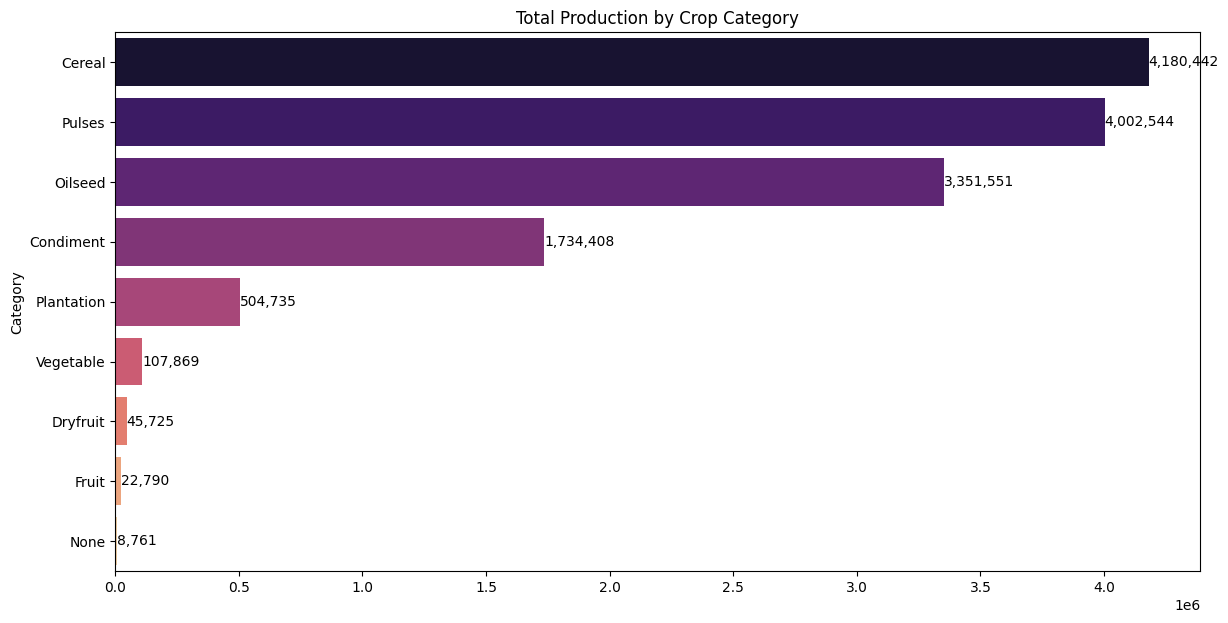

In [138]:
#11. Category-wise Production
plt.figure(figsize=(14, 7))
category_production = data.groupby('Category')['Production(tonnes)'].sum().sort_values(ascending=False)
sns.barplot(x=category_production.values, y=category_production.index, palette="magma")
plt.title('Total Production by Crop Category')
# Adding data labels
for index, value in enumerate(category_production.values):
    plt.text(value, index, f'{value:,.0f}', color='black', va="center", fontsize=10)
plt.show()

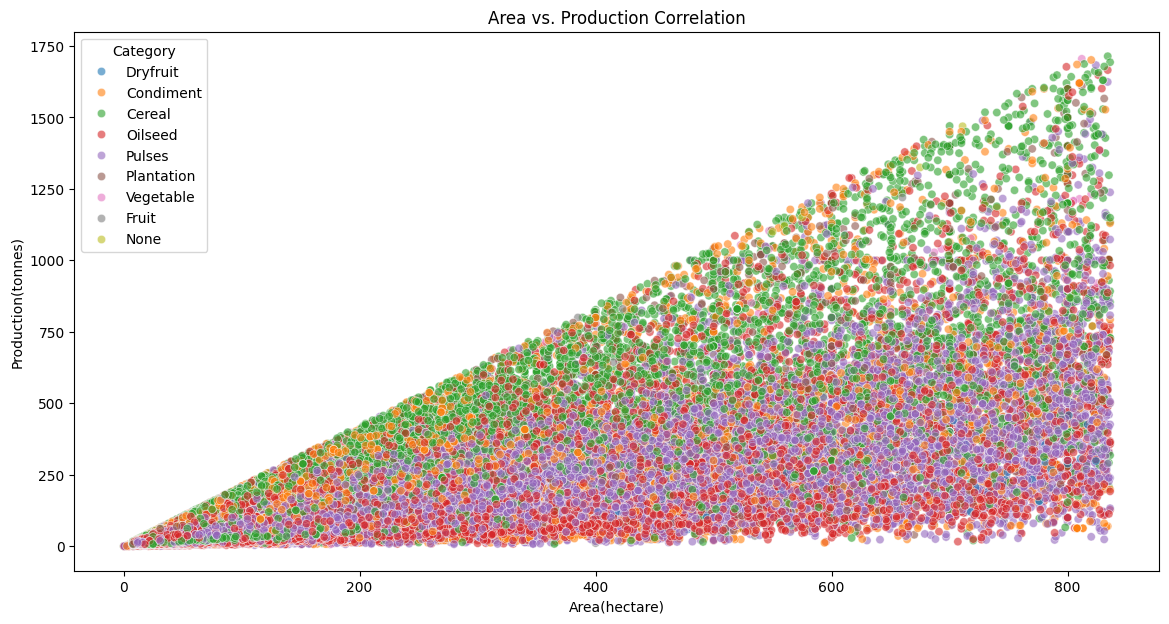

In [120]:
#12. Area vs. Production Correlation
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Area(hectare)', y='Production(tonnes)', hue='Category', alpha=0.6)
plt.title('Area vs. Production Correlation')
plt.legend(title='Category')
plt.show()

## **<u>Conclusion :**

The detailed analysis of crop production data across various dimensions—such as crop types, states, seasons, and years—reveals several key insights into the agricultural landscape. Below are the major conclusions:

- **Yearly Production Trends:** Fluctuations in total crop production over the years highlight the impact of climatic conditions, farming practices, and government support on agricultural output.

- **Top Crops Analysis:** Dominant crops like sugarcane, wheat, and paddy show varying production trends, indicating potential areas for intervention to stabilize or boost yields.

- **State-wise Contribution:** A few states, such as Uttar Pradesh and Punjab, contribute significantly to national crop production, underscoring regional agricultural strengths and potential risks.

- **Seasonal Production Patterns:** The Kharif season typically yields the highest production, aligning with monsoon rains, while Rabi and Zaid seasons show varied outputs.

- **Category-wise Production:** Cereals dominate crop categories, emphasizing their importance in ensuring food security.

- **Crop Area Distribution:** The majority of crops are cultivated on small to medium-sized plots, highlighting the prevalence of small-scale farming in India.

- **Correlation Analysis:** Strong correlations between area and production suggest focusing on improving productivity to enhance overall crop yields.

- **Recommendations:** Suggests incorporating external factors like rainfall and temperature, using predictive modeling, and increasing data granularity for more precise insights.

**Final Thoughts:**
This analysis sheds light on the complex and varied nature of crop production across India, with significant implications for policy-making, resource allocation, and farming practices. By focusing on the key areas identified, and through the use of more advanced data analytics and modeling, there is potential to further optimize agricultural outcomes and ensure the sustainability of India's agricultural sector.